# Titanic Project

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Getting the data

In [2]:
# Generating the training set

df_train = pd.read_csv('train.csv')

df_train.drop('Name', axis=1, inplace=True)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Generating the test set

df_test = pd.read_csv('test.csv')

df_test.drop('Name', axis=1, inplace=True)

df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


## Exploring the Data

### Evaluation of Datatypes

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
df_train.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

In [7]:
dtypes_list = list(df_train.dtypes.unique())

for data_type in dtypes_list:
    cols = df_train.select_dtypes(include=[data_type]).columns
    print(f'{data_type}: {list(cols)}')

int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
object: ['Sex', 'Ticket', 'Cabin', 'Embarked']
float64: ['Age', 'Fare']


### Evaluation of missing values

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### View Distribution

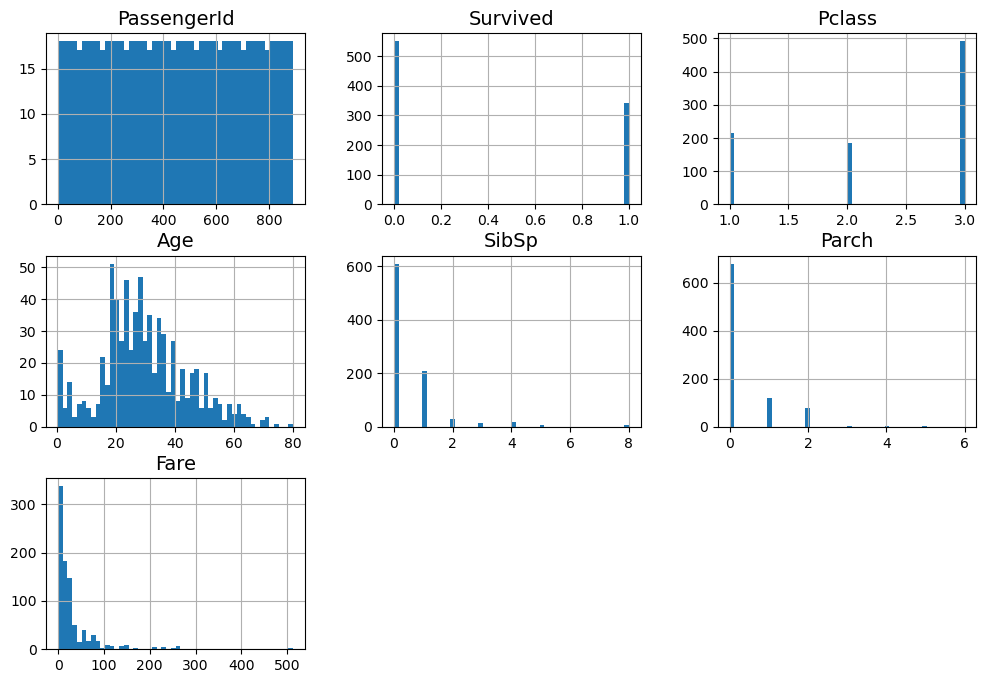

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

distrib_plot = df_train.hist(bins=50, figsize=(12, 8))
plt.show()

### Visualizing the Data

In [11]:
# View the unique column elements that can be used to countplot

# Using for loops
for columns in df_train.columns:
    if len(df_train[columns].unique()) <= 10:
        print(columns)
        
# Using list comprehension
cat_cols_list = [columns for columns in df_train.columns if len(df_train[columns].unique()) <= 10]

Survived
Pclass
Sex
SibSp
Parch
Embarked


In [12]:
for number, col in enumerate(df_train.columns):
    print(f'{number}, {col}')

0, PassengerId
1, Survived
2, Pclass
3, Sex
4, Age
5, SibSp
6, Parch
7, Ticket
8, Fare
9, Cabin
10, Embarked


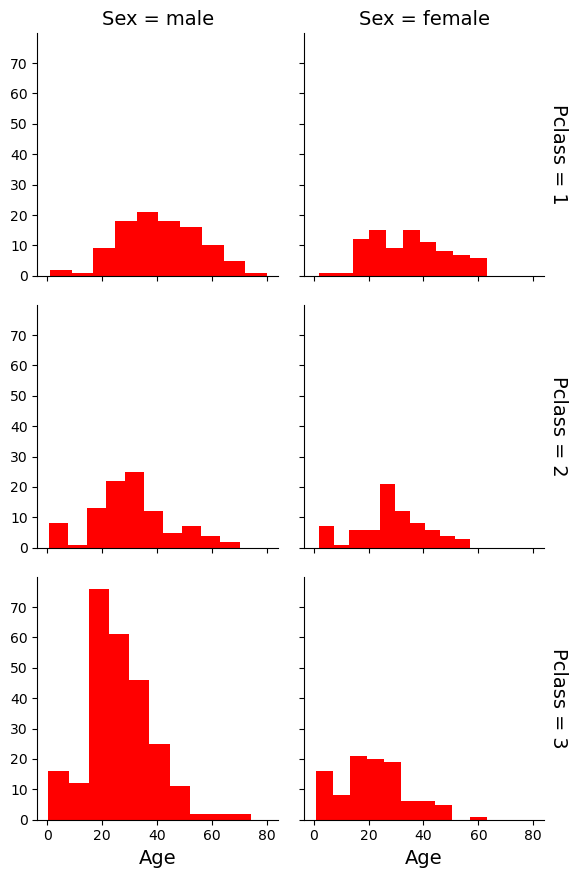

In [13]:
plot_params = {'data':               df_train,
               'row':               'Pclass',
               'column':            'Sex',
               'hist_basis':        'Age',
               'color':             'red'}

def cat_countplot(data, row, column, hist_basis, color):
    hist_plot = sns.FacetGrid(data, 
                              margin_titles=True,
                              col=column, row=row)
    hist_plot.map(plt.hist, hist_basis, color=color)
    return plt.show()
    
cat_countplot(**plot_params)

### Study the correlations

In [14]:
sorted_correlation_params = {'data': df_train, 
                             'target': 'Survived', 
                             'correl_method': 'pearson'}

def sorted_correlation(data, target, correl_method):
                             
    # Convert categorical values to numeric
    le = LabelEncoder()
    data[target] = le.fit_transform(data[target])
  
    # Create correlation matrix
    corr_mat = data.corr(method=correl_method)
  
    # Retain upper triangular values of correlation matrix and
    # make Lower triangular values Null
    upper_corr_mat = corr_mat.where(
        np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
  
    # Convert to 1-D series and drop Null values
    unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
    # Sort correlation pairs
    sorted_mat = unique_corr_pairs.sort_values()

    return sorted_mat

sorted_correlation(**sorted_correlation_params)

Fare      Pclass        -0.549500
Age       Pclass        -0.369226
Pclass    Survived      -0.338481
SibSp     Age           -0.308247
Parch     Age           -0.189119
Age       Survived      -0.077221
SibSp     PassengerId   -0.057527
          Survived      -0.035322
Pclass    PassengerId   -0.035144
Survived  PassengerId   -0.005007
Parch     PassengerId   -0.001652
Fare      PassengerId    0.012658
Parch     Pclass         0.018443
Age       PassengerId    0.036847
Parch     Survived       0.081629
SibSp     Pclass         0.083081
Fare      Age            0.096067
          SibSp          0.159651
          Parch          0.216225
          Survived       0.257307
Parch     SibSp          0.414838
dtype: float64

It appears that there is not much significant correlation in the dataset

### Applying Data Transformations

In [15]:
df_train_mod = df_train.copy()

In [16]:
df_train_mod['companions'] = df_train_mod['SibSp'] + df_train_mod['Parch']
df_train_mod['price per head'] = df_train_mod['Fare'] / df_train_mod['companions']

In [17]:
df_train_mod.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,companions,price per head
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.2500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,inf
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,53.1000
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,inf


In [18]:
df_train_mod['companions'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: companions, dtype: int64

In [19]:
df_train_mod['Fare'].sort_values(ascending=False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64

In [20]:
df_train[df_train['Age'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,male,NaN,0,0,349217,7.8958,NaN,S


## Preparing the Data

### Data Cleaning

1. Check Boxplot (Age per Pclass and by gender)
2. Determine the mean for each pclass

In [21]:
df_nonull = df_train.dropna()

In [22]:
df_nonull

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S


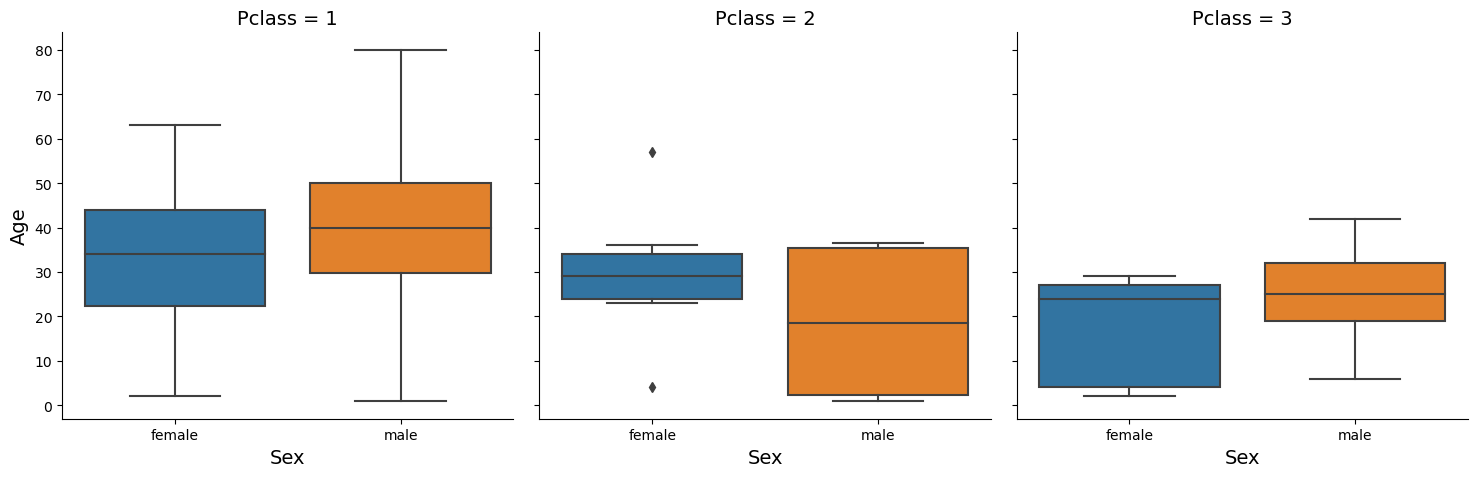

In [23]:
sns.catplot(
    data=df_nonull,       # DataFrame
    x='Sex',      # X-axis
    y='Age',       # y-axis
    col='Pclass',  # column
    kind='box',      # boxplot
    col_wrap=3
)

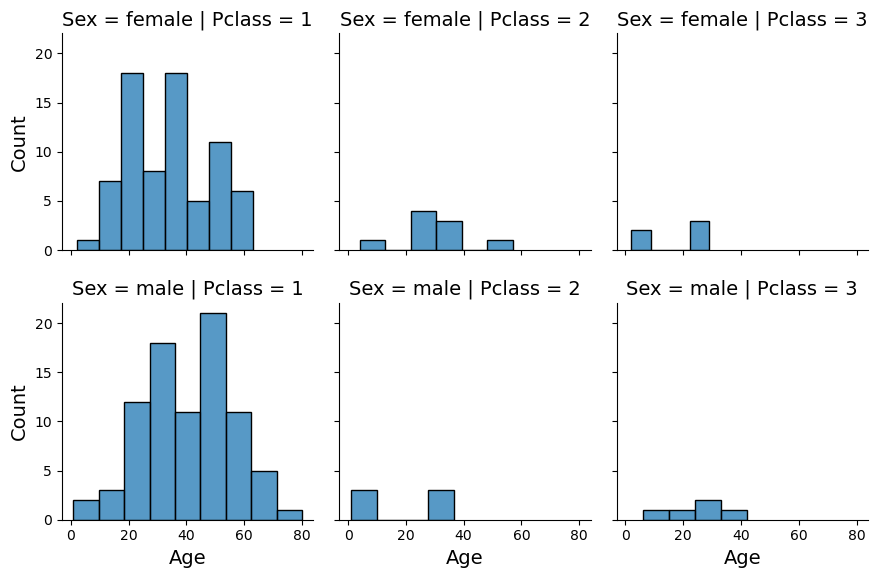

In [24]:
g = sns.FacetGrid(df_nonull, col="Pclass",  row="Sex")
g.map_dataframe(sns.histplot, x="Age")

In [25]:
pd.DataFrame(df_nonull.groupby(['Sex', 'Pclass'])['Age'].mean())

Age
Sex    Pclass           
female 1       34.094595
       2       29.611111
       3       17.200000
male   1       40.671667
       2       18.750000
       3       24.800000

In [26]:
pd.DataFrame(df_nonull.groupby(['Sex', 'Pclass'])['Age'].median())

Age
Sex    Pclass      
female 1       34.0
       2       29.0
       3       24.0
male   1       40.0
       2       18.5
       3       25.0

In [27]:
pd.DataFrame(df_nonull.groupby(['Sex', 'Pclass'])['Age'].median())

Age
Sex    Pclass      
female 1       34.0
       2       29.0
       3       24.0
male   1       40.0
       2       18.5
       3       25.0

We have determined the average and median age by sex and passenger class, based on these values, based on the analysis, it is much better to use the mean, becuase the distribution is something that is not uniform.


We will use these values to impute the NaN in the Age column in the dataset

### Fill missing values based on a condition

https://stackoverflow.com/questions/62314390/sklearn-impute-rows-satisfying-condition

In [28]:
df_imputed = df_train.copy()

In [29]:
df_imputed['Age'] = df_imputed['Age'].fillna(df_imputed.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))

In [30]:
df_imputed['Age'].head(20)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     26.507589
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    30.740707
18    31.000000
19    21.750000
Name: Age, dtype: float64

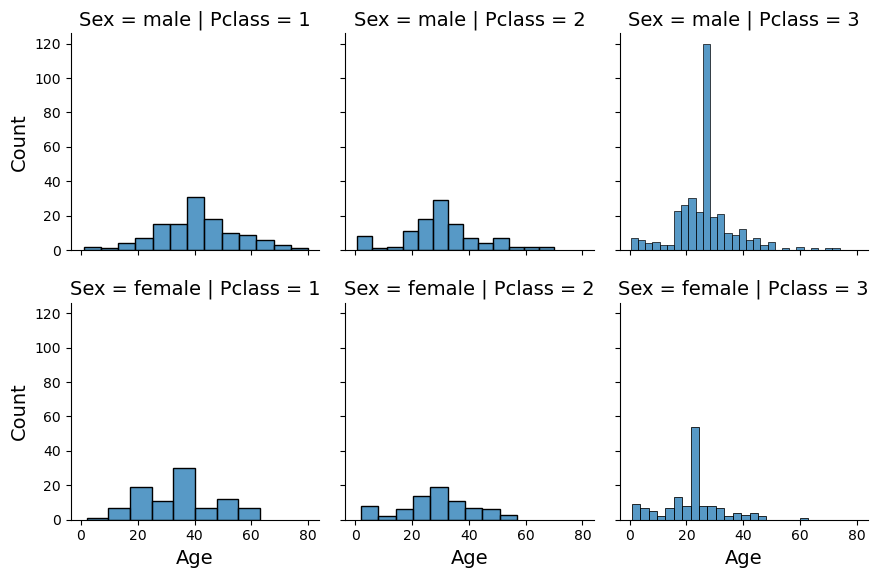

In [31]:
g = sns.FacetGrid(df_imputed, col="Pclass",  row="Sex")
g.map_dataframe(sns.histplot, x="Age")

In [32]:
df_impute_target = df_imputed['Survived']
df_impute_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Convert text into numbers

In [35]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
df_imputed["Sex"] = le.fit_transform(df_imputed["Sex"])
df_imputed["Embarked"] = le.fit_transform(df_imputed["Embarked"])

### Drop useless features

In [41]:
df_imputed = df_imputed.drop(['Ticket','Cabin','Survived'], axis=1)

KeyError: "['Ticket', 'Cabin', 'Survived'] not found in axis"

In [45]:
X = df_imputed
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.00,1,0,7.2500,2
1,2,1,0,38.00,1,0,71.2833,0
2,3,3,0,26.00,0,0,7.9250,2
3,4,1,0,35.00,1,0,53.1000,2
4,5,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.00,0,0,13.0000,2
887,888,1,0,19.00,0,0,30.0000,2
888,889,3,0,21.75,1,2,23.4500,2
889,890,1,1,26.00,0,0,30.0000,0


In [67]:
x_test = df_test_dropped

In [81]:
x_test['Age'] = x_test['Age'].fillna(x_test.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))
x_test['Age'] = x_test['Age'].astype(int)
x_test['Fare'] = x_test['Fare'].fillna(0)

In [83]:
x_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [48]:
y = df_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Shortlist Promising Models

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression(max_iter=150)
lr.fit(X, y)

LogisticRegression(max_iter=150)

In [84]:
lr_pred = lr.predict(x_test)